# Loading Data

In [0]:
import pyspark

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_extract
from pyspark.sql.functions import explode

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Read Multiple CSV Files") \
    .getOrCreate()

In [0]:
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/tanmay.k.singh@sjsu.edu/anomaly_label.csv")
df2 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/tanmay.k.singh@sjsu.edu/Event_occurrence_matrix.csv")
df3 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/tanmay.k.singh@sjsu.edu/HDFS_log_templates.csv")
df4 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/tanmay.k.singh@sjsu.edu/Event_traces.csv")
hdfs_logs = spark.read.format("csv").option("header", "false").load("dbfs:/FileStore/shared_uploads/nikhilsarma.gudur@sjsu.edu/HDFS.log")

In [0]:
print("Anomaly Label DataFrame:")
df1.show()

Anomaly Label DataFrame:
+--------------------+-------+
|             BlockId|  Label|
+--------------------+-------+
|blk_-160899968791...| Normal|
|blk_7503483334202...| Normal|
|blk_-354458337728...|Anomaly|
|blk_-907399258668...| Normal|
|blk_7854771516489...| Normal|
|blk_1717858812220...| Normal|
|blk_-251961732037...| Normal|
|blk_7063315473424...| Normal|
|blk_8586544123689...| Normal|
|blk_2765344736980...| Normal|
|blk_-290049055749...| Normal|
|blk_-502732577314...| Normal|
|blk_4394112519745...| Normal|
|blk_3640100967125...| Normal|
|blk_-401156444932...| Normal|
|blk_-853131033556...|Anomaly|
|blk_-340992364514...| Normal|
|blk_3974948352784...| Normal|
|blk_5647760196018...| Normal|
|blk_-202775138379...| Normal|
+--------------------+-------+
only showing top 20 rows



In [0]:
df2.show()

+--------------------+-------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|             BlockId|  Label|Type| E1| E2| E3| E4| E5| E6| E7| E8| E9|E10|E11|E12|E13|E14|E15|E16|E17|E18|E19|E20|E21|E22|E23|E24|E25|E26|E27|E28|E29|
+--------------------+-------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|blk_-160899968791...|Success|null|  0|  0|203|  0| 10|  7|  0|  0|  3|  0|  3|  0|  0|  0|  0|  4|  0|  4|  0|  0| 10|  1| 10|  0|  4| 10|  0|  0|  0|
|blk_7503483334202...|Success|null|  0|  2|  1|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  1|  3|  0|  0|  3|  0|  0|  0|
|blk_-354458337728...|   Fail|  21|  0|  0|203|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  1|  3|  1|  3|  0|  0|  3|  0|  0|  0|
|blk_-907399258668...|Success|null|  0|  3|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0| 

In [0]:
df2 = df2.drop('Label')
df2.show()

+--------------------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|             BlockId|Type| E1| E2| E3| E4| E5| E6| E7| E8| E9|E10|E11|E12|E13|E14|E15|E16|E17|E18|E19|E20|E21|E22|E23|E24|E25|E26|E27|E28|E29|
+--------------------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|blk_-160899968791...|null|  0|  0|203|  0| 10|  7|  0|  0|  3|  0|  3|  0|  0|  0|  0|  4|  0|  4|  0|  0| 10|  1| 10|  0|  4| 10|  0|  0|  0|
|blk_7503483334202...|null|  0|  2|  1|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  1|  3|  0|  0|  3|  0|  0|  0|
|blk_-354458337728...|  21|  0|  0|203|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  1|  3|  1|  3|  0|  0|  3|  0|  0|  0|
|blk_-907399258668...|null|  0|  3|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  1|  3|  0|  0|  3|  0| 

In [0]:
df2 = df2.withColumnRenamed("BlockId", "df2BlockId")
df2.show()

+--------------------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|          df2BlockId|Type| E1| E2| E3| E4| E5| E6| E7| E8| E9|E10|E11|E12|E13|E14|E15|E16|E17|E18|E19|E20|E21|E22|E23|E24|E25|E26|E27|E28|E29|
+--------------------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|blk_-160899968791...|null|  0|  0|203|  0| 10|  7|  0|  0|  3|  0|  3|  0|  0|  0|  0|  4|  0|  4|  0|  0| 10|  1| 10|  0|  4| 10|  0|  0|  0|
|blk_7503483334202...|null|  0|  2|  1|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  1|  3|  0|  0|  3|  0|  0|  0|
|blk_-354458337728...|  21|  0|  0|203|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  1|  3|  1|  3|  0|  0|  3|  0|  0|  0|
|blk_-907399258668...|null|  0|  3|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  1|  3|  0|  0|  3|  0| 

In [0]:
df= df1.join(df2, df1.BlockId == df2.df2BlockId, "inner")
df.show()

+--------------------+------+--------------------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|             BlockId| Label|          df2BlockId|Type| E1| E2| E3| E4| E5| E6| E7| E8| E9|E10|E11|E12|E13|E14|E15|E16|E17|E18|E19|E20|E21|E22|E23|E24|E25|E26|E27|E28|E29|
+--------------------+------+--------------------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|blk_-100004553717...|Normal|blk_-100004553717...|null|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  1|  0|  0|  0|  3|  0|  0|  0|
|blk_-100021874837...|Normal|blk_-100021874837...|null|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  1|  3|  0|  0|  3|  0|  0|  0|
|blk_-100028489120...|Normal|blk_-100028489120...|null|  0|  1|  2|  1|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3| 

In [0]:
df = df.drop('df2BlockId')
df.show()

+--------------------+------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|             BlockId| Label|Type| E1| E2| E3| E4| E5| E6| E7| E8| E9|E10|E11|E12|E13|E14|E15|E16|E17|E18|E19|E20|E21|E22|E23|E24|E25|E26|E27|E28|E29|
+--------------------+------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|blk_-100004553717...|Normal|null|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  1|  0|  0|  0|  3|  0|  0|  0|
|blk_-100021874837...|Normal|null|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  1|  3|  0|  0|  3|  0|  0|  0|
|blk_-100028489120...|Normal|null|  0|  1|  2|  1|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  1|  3|  0|  0|  3|  0|  0|  0|
|blk_-100029668880...|Normal|null|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|

In [0]:
from pyspark.sql.functions import col

columns_to_convert = [
    'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
    'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20',
    'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29'
]


for column in columns_to_convert:
    df = df.withColumn(column, col(column).cast('int'))

# Show the resulting DataFrame
df.printSchema()
df.show()

root
 |-- BlockId: string (nullable = true)
 |-- Label: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- E1: integer (nullable = true)
 |-- E2: integer (nullable = true)
 |-- E3: integer (nullable = true)
 |-- E4: integer (nullable = true)
 |-- E5: integer (nullable = true)
 |-- E6: integer (nullable = true)
 |-- E7: integer (nullable = true)
 |-- E8: integer (nullable = true)
 |-- E9: integer (nullable = true)
 |-- E10: integer (nullable = true)
 |-- E11: integer (nullable = true)
 |-- E12: integer (nullable = true)
 |-- E13: integer (nullable = true)
 |-- E14: integer (nullable = true)
 |-- E15: integer (nullable = true)
 |-- E16: integer (nullable = true)
 |-- E17: integer (nullable = true)
 |-- E18: integer (nullable = true)
 |-- E19: integer (nullable = true)
 |-- E20: integer (nullable = true)
 |-- E21: integer (nullable = true)
 |-- E22: integer (nullable = true)
 |-- E23: integer (nullable = true)
 |-- E24: integer (nullable = true)
 |-- E25: integer (nullable 

In [0]:
# EDA

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation


# Assemble the columns into a vector
assembler = VectorAssembler(inputCols=[f"E{i}" for i in range(1, 30)], outputCol="features")
vector_df = assembler.transform(df).select("features")

# Compute the correlation matrix
correlation_matrix = Correlation.corr(vector_df, "features").head()[0]

# Convert to numpy array for better readability
import numpy as np
correlation_matrix_array = correlation_matrix.toArray()

print("Correlation matrix:\n", correlation_matrix_array)


Correlation matrix:
 [[ 1.00000000e+00 -1.06002917e-03 -8.73338016e-04 -1.13832044e-03
   3.74190789e-02  1.58080881e-02 -2.17206082e-04 -2.56923716e-05
   3.08621213e-04  1.55773325e-01  1.93349458e-02 -1.86971590e-05
  -8.59344371e-05 -2.88988726e-05  3.27956405e-01  1.66562231e-02
  -1.16653461e-05  1.65364454e-02  3.38056873e-01  5.54270558e-03
   1.89673225e-03             nan -6.94911252e-05 -7.77686359e-06
   1.65364454e-02  1.16137488e-02 -1.21394227e-04 -1.35156007e-04
  -2.61089747e-05]
 [-1.06002917e-03  1.00000000e+00  5.23967419e-02  2.97071573e-01
   3.58880277e-02  1.50759428e-02 -2.56265626e-02 -2.51980207e-03
   3.75870039e-02 -1.98490557e-03  3.74015477e-02 -1.63709571e-03
  -1.52869489e-03 -2.21646774e-03 -1.15920592e-03  1.55871483e-02
   6.90519229e-03  1.57423153e-02 -8.95887047e-04 -3.59142026e-03
   1.31532682e-01             nan  1.29843112e-01  4.72961332e-03
   1.57423153e-02  3.65193973e-02 -3.67364728e-03  2.11536372e-02
  -2.63001097e-04]
 [-8.73338016e-04

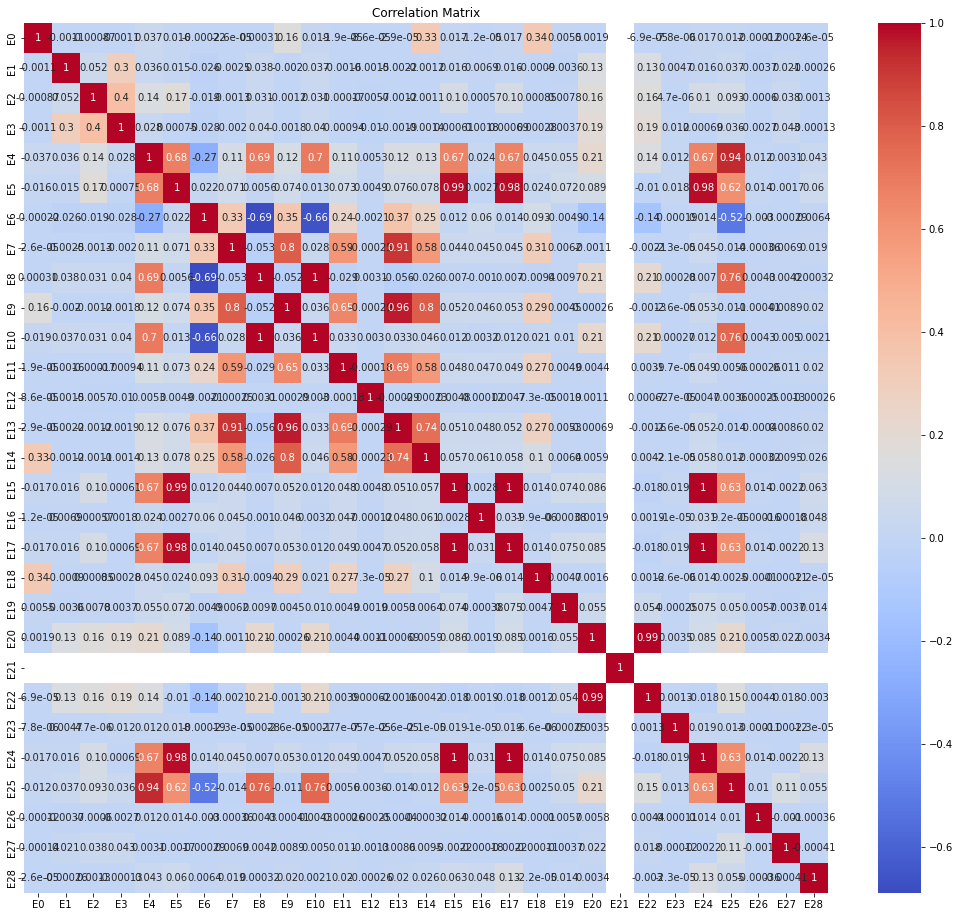

In [0]:
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import DenseMatrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'vector_df' is your DataFrame with a 'features' column

# Compute the correlation matrix
correlation_matrix = Correlation.corr(vector_df, "features").head()[0]

# If the result is a DenseMatrix, convert it to a list of lists
if isinstance(correlation_matrix, DenseMatrix):
    matrix_values = correlation_matrix.values
    num_cols = correlation_matrix.numCols
    matrix_array = np.array(matrix_values).reshape(num_cols, num_cols)

# Create a correlation matrix graph using Matplotlib and Seaborn
plt.figure(figsize=(18, 16))
sns.heatmap(matrix_array, annot=True, cmap='coolwarm', xticklabels=[f"E{i}" for i in range(num_cols)], yticklabels=[f"E{i}" for i in range(num_cols)])
plt.title('Correlation Matrix')
plt.show()


In [0]:
from pyspark.sql.functions import  sum

null_counts = df.select([sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])
null_counts.show()

+-------+-----+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|BlockId|Label|  Type| E1| E2| E3| E4| E5| E6| E7| E8| E9|E10|E11|E12|E13|E14|E15|E16|E17|E18|E19|E20|E21|E22|E23|E24|E25|E26|E27|E28|E29|
+-------+-----+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|      0|    0|558223|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
+-------+-----+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [0]:
df = df.drop('Type')
df.show()

+--------------------+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|             BlockId| Label| E1| E2| E3| E4| E5| E6| E7| E8| E9|E10|E11|E12|E13|E14|E15|E16|E17|E18|E19|E20|E21|E22|E23|E24|E25|E26|E27|E28|E29|
+--------------------+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|blk_-100004553717...|Normal|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  1|  0|  0|  0|  3|  0|  0|  0|
|blk_-100021874837...|Normal|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  1|  3|  0|  0|  3|  0|  0|  0|
|blk_-100028489120...|Normal|  0|  1|  2|  1|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  1|  3|  0|  0|  3|  0|  0|  0|
|blk_-100029668880...|Normal|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  1|  3|  0

In [0]:
unique_labels = df.select("Label").distinct()

# Show the unique values
unique_labels.show()

+-------+
|  Label|
+-------+
|Anomaly|
| Normal|
+-------+



In [0]:
from pyspark.sql.functions import when, col

# Replace 'abnormal' with 1 and 'normal' with 0 in the 'Label' column
df = df.withColumn("Label", when(col("Label") == "Anomaly", 1).otherwise(0))

# Show the updated DataFrame
df.show()

+--------------------+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|             BlockId|Label| E1| E2| E3| E4| E5| E6| E7| E8| E9|E10|E11|E12|E13|E14|E15|E16|E17|E18|E19|E20|E21|E22|E23|E24|E25|E26|E27|E28|E29|
+--------------------+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|blk_-100004553717...|    0|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  1|  0|  0|  0|  3|  0|  0|  0|
|blk_-100021874837...|    0|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  1|  3|  0|  0|  3|  0|  0|  0|
|blk_-100028489120...|    0|  0|  1|  2|  1|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  1|  3|  0|  0|  3|  0|  0|  0|
|blk_-100029668880...|    0|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  1|  3|  0|  0|  

In [0]:
output_path = "dbfs:/FileStore/shared_uploads/tanmay.k.singh@sjsu.edu/demo_cleaned.csv"  # Replace with your desired output path
df.write.csv(output_path, header=True, mode="overwrite")

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import DenseMatrix

#  Assemble the features into a vector
assembler = VectorAssembler(inputCols=df.columns[1:], outputCol="features")
vector_df = assembler.transform(df)

#  Compute the correlation matrix
correlation_matrix = Correlation.corr(vector_df, "features").head()[0]

# If the result is a DenseMatrix, convert it to a numpy array for easier handling
if isinstance(correlation_matrix, DenseMatrix):
    matrix_values = correlation_matrix.values
    num_cols = correlation_matrix.numCols
    matrix_array = np.array(matrix_values).reshape(num_cols, num_cols)

# Print the correlation matrix
print(matrix_array)


[[ 1.00000000e+00  1.69780787e-02 -6.85155863e-03 -2.91449839e-03
  -1.39550521e-02 -2.10662421e-01  2.99925586e-01  4.24131629e-01
   5.01687030e-02 -6.02635140e-01  5.71364404e-02 -5.97807985e-01
   3.65093666e-02  1.67801529e-01  5.64299388e-02  4.52433689e-02
   3.09966728e-01  2.27785621e-02  3.12341209e-01  1.43490777e-02
   5.25625299e-01 -4.85860793e-02             nan -7.81235996e-02
   1.51856421e-02  3.12341209e-01 -2.54903547e-01  2.36291406e-01
   2.61381971e-01  5.09821909e-02]
 [ 1.69780787e-02  1.00000000e+00 -1.06002917e-03 -8.73338016e-04
  -1.13832044e-03  3.74190789e-02  1.58080881e-02 -2.17206082e-04
  -2.56923716e-05  3.08621213e-04  1.55773325e-01  1.93349458e-02
  -1.86971590e-05 -8.59344371e-05 -2.88988726e-05  3.27956405e-01
   1.66562231e-02 -1.16653461e-05  1.65364454e-02  3.38056873e-01
   5.54270558e-03  1.89673225e-03             nan -6.94911252e-05
  -7.77686359e-06  1.65364454e-02  1.16137488e-02 -1.21394227e-04
  -1.35156007e-04 -2.61089747e-05]
 [-6.8

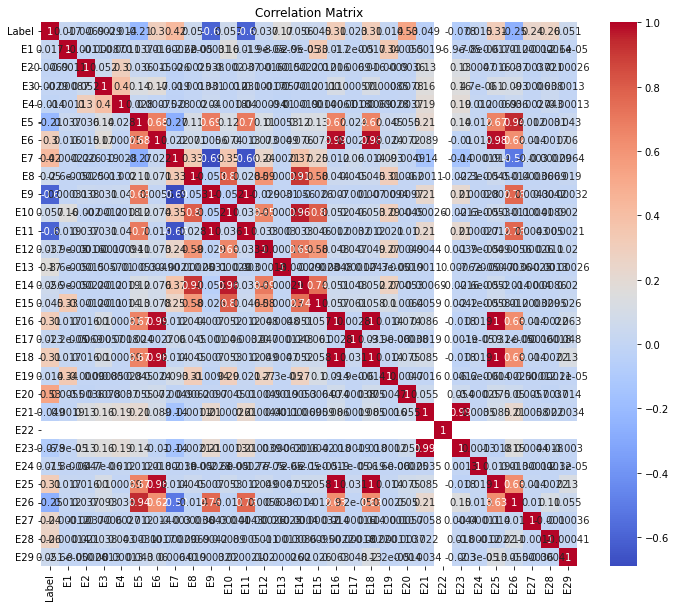

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import DenseMatrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#  Assemble the features into a vector
assembler = VectorAssembler(inputCols=df.columns[1:], outputCol="features")
vector_df = assembler.transform(df)

#  Compute the correlation matrix
correlation_matrix = Correlation.corr(vector_df, "features").head()[0]

# If the result is a DenseMatrix, convert it to a numpy array for easier handling
if isinstance(correlation_matrix, DenseMatrix):
    matrix_values = correlation_matrix.values
    num_cols = correlation_matrix.numCols
    matrix_array = np.array(matrix_values).reshape(num_cols, num_cols)

#  Plot the correlation matrix using Matplotlib and Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(matrix_array, annot=True, cmap='coolwarm', xticklabels=df.columns[1:], yticklabels=df.columns[1:])
plt.title('Correlation Matrix')
plt.show()


In [0]:
df.select("E22").distinct().count()

Out[48]: 1

In [0]:
# Check for unique values in E22
unique_values_E22 = df.select("E22").distinct().collect()

# Print unique values
print(f"Unique values in E22: {[row['E22'] for row in unique_values_E22]}")

Unique values in E22: [1]


In [0]:
df = df.drop("E22")


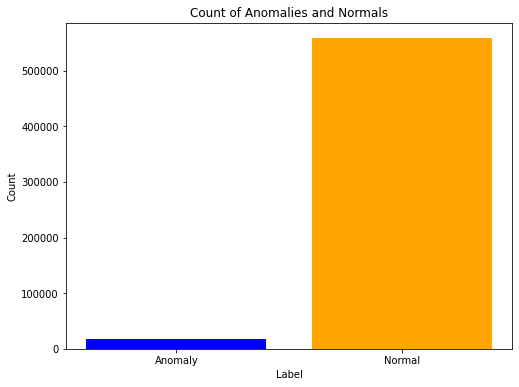

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt


#Count the occurrences of each value in the "Label" column
label_counts = df.groupBy("Label").count().collect()

# Convert the result to a dictionary
label_count_dict = {row["Label"]: row["count"] for row in label_counts}

# Create lists for labels and counts
labels = ['Anomaly' if key == 1 else 'Normal' for key in label_count_dict.keys()]
counts = list(label_count_dict.values())

# Plot the bar graph using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'orange'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Anomalies and Normals')
plt.show()


In [0]:
# count of Anomaly(0) and Normal(1)
counts

Out[52]: [16838, 558223]

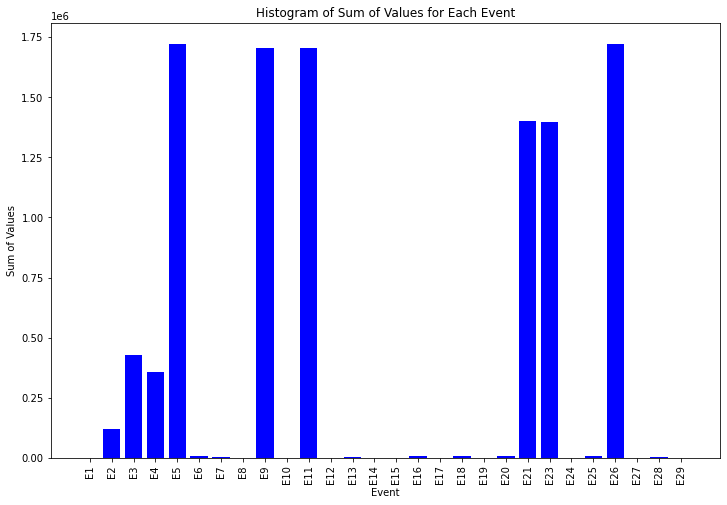

In [0]:
from pyspark.sql.functions import col, sum as _sum
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Step 1: Sum the values of each column from E1 to E29
sum_columns = df.select([_sum(col(column)).alias(column) for column in df.columns[2:]])

# Collect the sum of each column into a dictionary
sum_dict = sum_columns.collect()[0].asDict()

# Prepare data for plotting
events = list(sum_dict.keys())
values = list(sum_dict.values())

# Step 2: Plot the histogram using Matplotlib
plt.figure(figsize=(12, 8))
plt.bar(events, values, color='blue')
plt.xlabel('Event')
plt.ylabel('Sum of Values')
plt.title('Histogram of Sum of Values for Each Event')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [0]:
# Count of BlockID
df.select("BlockId").count()

Out[54]: 575061

In [0]:
# Get the number of rows
num_rows = df.count()

# Get the number of columns
num_columns = len(df.columns)

# Print the shape of the DataFrame
print(f"The shape of the DataFrame is: ({num_rows}, {num_columns})")

The shape of the DataFrame is: (575061, 30)


In [0]:
# Remove Highly Correlated Features 
# Set the correlation threshold
threshold = 0.9

# Identify highly correlated pairs
to_remove = set()
for i in range(num_cols):
    for j in range(i + 1, num_cols):
        if abs(matrix_array[i, j]) > threshold:
            to_remove.add(df.columns[i + 1])

# Drop highly correlated features
df = df.drop(*to_remove)

# Show the remaining columns
print("Remaining columns:", df.columns)

Remaining columns: ['BlockId', 'Label', 'E1', 'E2', 'E3', 'E4', 'E7', 'E11', 'E12', 'E13', 'E14', 'E15', 'E17', 'E19', 'E20', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29']


In [0]:
# descriptive statistics
df.describe().show()


+-------+--------------------+--------------------+--------------------+-------------------+------------------+-----------------+--------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+
|summary|             BlockId|               Label|                  E1|                 E2|                E3|               E4|                  E7|               E11|                 E12|                 E13|                 E14|                 E15|                 E17|                 E19|                 E20|               E23|                 E24|                 E25|                E26|                 E27|                 E28|                 E29|
+-------+--------------------+--------------------+--------------------+------

In [0]:
from pyspark.sql.functions import skewness

numerical_cols = [col for col in df.columns]

# Calculate skewness for each numerical column
skewness_df = df.select([skewness(col).alias(col) for col in numerical_cols])

# Show the skewness values
skewness_df.show()


+-------+-----------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+
|BlockId|            Label|               E1|                E2|               E3|               E4|                E7|               E11|              E12|              E13|               E14|               E15|               E17|              E19|               E20|                E23|              E24|               E25|                E26|               E27|               E28|               E29|
+-------+-----------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+-----------------+------------------+-

In [0]:
# Checking duplicate values
from pyspark.sql import SparkSession

# Count the total number of rows
total_rows = df.count()

# Drop duplicates and count the number of unique rows
unique_rows = df.dropDuplicates().count()

# Calculate the number of duplicate rows
duplicate_rows = total_rows - unique_rows

# Print the counts
print(f"Total rows: {total_rows}")
print(f"Unique rows: {unique_rows}")
print(f"Duplicate rows: {duplicate_rows}")

# Show duplicate rows if any
if duplicate_rows > 0:
    # Find all duplicate rows
    df_duplicates = df.groupBy(df.columns).count().filter("count > 1")
    df_duplicates.show()
else:
    print("No duplicate rows found.")


Total rows: 575061
Unique rows: 575061
Duplicate rows: 0
No duplicate rows found.


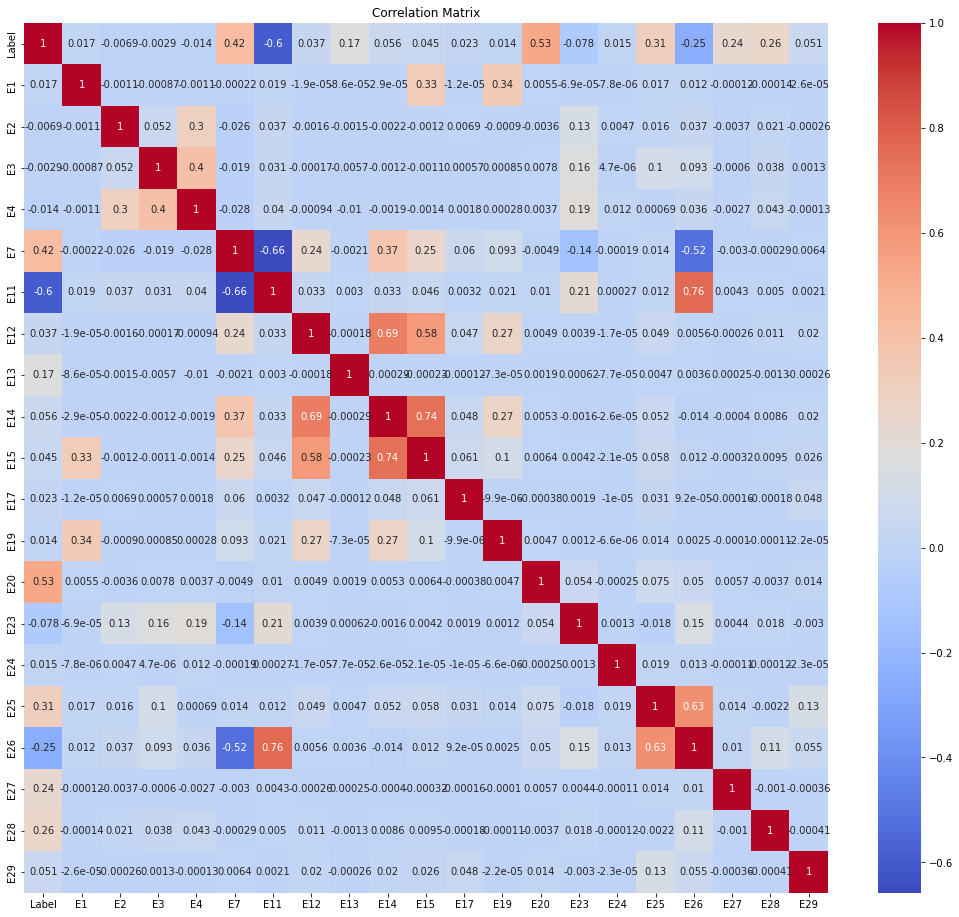

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import DenseMatrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#  Assemble the features into a vector (excluding E22 )
assembler = VectorAssembler(inputCols=df.columns[1:], outputCol="features")
vector_df = assembler.transform(df)

# Compute the correlation matrix
correlation_matrix = Correlation.corr(vector_df, "features").head()[0]

# If the result is a DenseMatrix, convert it to a numpy array for easier handling
if isinstance(correlation_matrix, DenseMatrix):
    matrix_values = correlation_matrix.values
    num_cols = correlation_matrix.numCols
    matrix_array = np.array(matrix_values).reshape(num_cols, num_cols)

# Plot the correlation matrix using Matplotlib and Seaborn
plt.figure(figsize=(18, 16))
sns.heatmap(matrix_array, annot=True, cmap='coolwarm', xticklabels=df.columns[1:], yticklabels=df.columns[1:])
plt.title('Correlation Matrix')
plt.show()


In [0]:
df.columns

Out[86]: ['BlockId',
 'Label',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14',
 'E15',
 'E16',
 'E17',
 'E18',
 'E19',
 'E20',
 'E21',
 'E23',
 'E24',
 'E25',
 'E26',
 'E27',
 'E28',
 'E29']

In [0]:
df=df.drop('BlockId')

In [0]:
df.columns

Out[88]: ['Label',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14',
 'E15',
 'E16',
 'E17',
 'E18',
 'E19',
 'E20',
 'E21',
 'E23',
 'E24',
 'E25',
 'E26',
 'E27',
 'E28',
 'E29']

In [0]:
df.dtypes

Out[89]: [('Label', 'int'),
 ('E1', 'int'),
 ('E2', 'int'),
 ('E3', 'int'),
 ('E4', 'int'),
 ('E5', 'int'),
 ('E6', 'int'),
 ('E7', 'int'),
 ('E8', 'int'),
 ('E9', 'int'),
 ('E10', 'int'),
 ('E11', 'int'),
 ('E12', 'int'),
 ('E13', 'int'),
 ('E14', 'int'),
 ('E15', 'int'),
 ('E16', 'int'),
 ('E17', 'int'),
 ('E18', 'int'),
 ('E19', 'int'),
 ('E20', 'int'),
 ('E21', 'int'),
 ('E23', 'int'),
 ('E24', 'int'),
 ('E25', 'int'),
 ('E26', 'int'),
 ('E27', 'int'),
 ('E28', 'int'),
 ('E29', 'int')]

In [0]:
df.show()

+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|Label| E1| E2| E3| E4| E5| E6| E7| E8| E9|E10|E11|E12|E13|E14|E15|E16|E17|E18|E19|E20|E21|E23|E24|E25|E26|E27|E28|E29|
+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|    0|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  0|  0|  0|
|    0|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  3|  0|  0|  3|  0|  0|  0|
|    0|  0|  1|  2|  1|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  3|  0|  0|  3|  0|  0|  0|
|    0|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  3|  0|  0|  3|  0|  0|  0|
|    0|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  0|  0|  0|
|    0|  0|  0|  0|  0|  3|  0|  0|  0| 

In [0]:
df= df.drop("BlockId")
df.show()

+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|Label| E1| E2| E3| E4| E5| E6| E7| E8| E9|E10|E11|E12|E13|E14|E15|E16|E17|E18|E19|E20|E21|E23|E24|E25|E26|E27|E28|E29|
+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|    0|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  0|  0|  0|
|    0|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  3|  0|  0|  3|  0|  0|  0|
|    0|  0|  1|  2|  1|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  3|  0|  0|  3|  0|  0|  0|
|    0|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  3|  0|  0|  3|  0|  0|  0|
|    0|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  0|  0|  0|
|    0|  0|  0|  0|  0|  3|  0|  0|  0| 

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col, explode, array, lit


feature_columns = [f'E{i}' for i in range(1, 30) if i not in {5, 6, 8, 9, 10, 16, 18, 21, 22}]

# Oversample the minority class
major_df = df.filter(col("Label") == 0)
minor_df = df.filter(col("Label") == 1)
ratio = int(major_df.count() / minor_df.count())
oversampled_df = minor_df.withColumn("dummy", explode(array([lit(x) for x in range(ratio)]))).drop('dummy')
combined_df = major_df.unionAll(oversampled_df)

In [0]:
combined_df.show()

+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|Label| E1| E2| E3| E4| E5| E6| E7| E8| E9|E10|E11|E12|E13|E14|E15|E16|E17|E18|E19|E20|E21|E23|E24|E25|E26|E27|E28|E29|
+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|    0|  0|  3|  1| 15|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  3|  0|  0|  3|  0|  0|  0|
|    0|  0|  3|  1| 15|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  3|  0|  0|  3|  0|  0|  0|
|    0|  0|  3|  1| 15|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  3|  0|  0|  3|  0|  0|  0|
|    0|  0|  3|  1|  2|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  3|  0|  0|  3|  0|  0|  0|
|    0|  0|  3|  1|  2|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  3|  0|  0|  3|  0|  0|  0|
|    0|  0|  3|  1|  2|  3|  0|  0|  0| 

In [0]:
# Split the data into training (70%), test (20%), and validation (10%) sets
train, test, val = combined_df.randomSplit([0.7, 0.2, 0.1], seed=666)

# Show the counts for each split
print(f"Train count: {train.count()}")
print(f"Test count: {test.count()}")
print(f"Validation count: {val.count()}")

Train count: 779659
Test count: 222823
Validation count: 111395


In [0]:
features_creator = VectorAssembler(inputCols=feature_columns, outputCol="rawFeatures")

# StandardScaler
scaler = StandardScaler(inputCol="rawFeatures", outputCol="scaledFeatures", withStd=True, withMean=True)

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(labelCol="Label", featuresCol="scaledFeatures")

# Pipeline
pipeline = Pipeline(stages=[features_creator, scaler, decision_tree])

# Fit the model
dc_model = pipeline.fit(train)



# Model 

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier, LogisticRegression, RandomForestClassifier
# Define the models
decision_tree = DecisionTreeClassifier(labelCol="Label", featuresCol="scaledFeatures")
logistic_regression = LogisticRegression(labelCol="Label", featuresCol="scaledFeatures", maxIter=10)
random_forest = RandomForestClassifier(labelCol="Label", featuresCol="scaledFeatures", numTrees=100)

# Create Pipelines for each model
dt_pipeline = Pipeline(stages=[features_creator, scaler, decision_tree])
lr_pipeline = Pipeline(stages=[features_creator, scaler, logistic_regression])
rf_pipeline = Pipeline(stages=[features_creator, scaler, random_forest])

# Fit the models
dt_model = dt_pipeline.fit(train)
lr_model = lr_pipeline.fit(train)
rf_model = rf_pipeline.fit(train)

# Make predictions on the validation set
dt_predictions = dt_model.transform(test)
lr_predictions = lr_model.transform(test)
rf_predictions = rf_model.transform(test)

# Evaluators
binary_evaluator = BinaryClassificationEvaluator(labelCol="Label", rawPredictionCol="rawPrediction")
multiclass_evaluator = MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction", metricName="f1")

# Decision Tree Evaluation
dt_roc_auc = binary_evaluator.evaluate(dt_predictions, {binary_evaluator.metricName: "areaUnderROC"})
dt_pr_auc = binary_evaluator.evaluate(dt_predictions, {binary_evaluator.metricName: "areaUnderPR"})
dt_f1_score = multiclass_evaluator.evaluate(dt_predictions)

# Logistic Regression Evaluation
lr_roc_auc = binary_evaluator.evaluate(lr_predictions, {binary_evaluator.metricName: "areaUnderROC"})
lr_pr_auc = binary_evaluator.evaluate(lr_predictions, {binary_evaluator.metricName: "areaUnderPR"})
lr_f1_score = multiclass_evaluator.evaluate(lr_predictions)

# Random Forest Evaluation
rf_roc_auc = binary_evaluator.evaluate(rf_predictions, {binary_evaluator.metricName: "areaUnderROC"})
rf_pr_auc = binary_evaluator.evaluate(rf_predictions, {binary_evaluator.metricName: "areaUnderPR"})
rf_f1_score = multiclass_evaluator.evaluate(rf_predictions)

# Print the results
print(f"Decision Tree - ROC AUC: {dt_roc_auc}, PR AUC: {dt_pr_auc}, F1 Score: {dt_f1_score}")
print(f"Logistic Regression - ROC AUC: {lr_roc_auc}, PR AUC: {lr_pr_auc}, F1 Score: {lr_f1_score}")
print(f"Random Forest - ROC AUC: {rf_roc_auc}, PR AUC: {rf_pr_auc}, F1 Score: {rf_f1_score}")


Decision Tree - ROC AUC: 0.9928162961506262, PR AUC: 0.9963704415060219, F1 Score: 0.9970738910475856
Logistic Regression - ROC AUC: 0.9992478341220646, PR AUC: 0.9973711176151167, F1 Score: 0.9990395963128826
Random Forest - ROC AUC: 0.9996529496984198, PR AUC: 0.9996129370020962, F1 Score: 0.9836121940612617


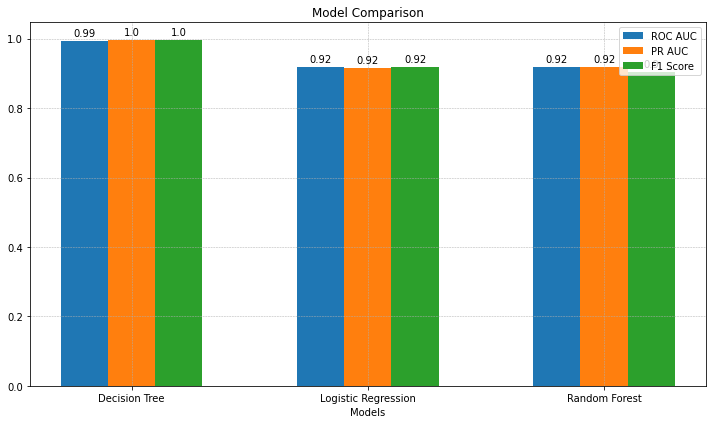

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# Collect metrics for plotting
models = ["Decision Tree", "Logistic Regression", "Random Forest"]
roc_auc = [dt_roc_auc, lr_roc_auc, rf_roc_auc]
pr_auc = [dt_pr_auc, lr_pr_auc, rf_pr_auc]
f1_score = [dt_f1_score, lr_f1_score, rf_f1_score]

# Plotting the results
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, roc_auc, width, label='ROC AUC')
rects2 = ax.bar(x, pr_auc, width, label='PR AUC')
rects3 = ax.bar(x + width, f1_score, width, label='F1 Score')

#Add some text for labels, title and axes ticks
ax.set_xlabel('Models')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
# ax.set_ylim([0.5, 1.0]) 
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [0]:
# Evaluate the model on the validation set
val_predictions = dc_model.transform(val)
evaluator = BinaryClassificationEvaluator(labelCol="Label", rawPredictionCol='rawPrediction')
val_accuracy = evaluator.evaluate(val_predictions, {evaluator.metricName: "areaUnderROC"})
val_pr = evaluator.evaluate(val_predictions, {evaluator.metricName: "areaUnderPR"})
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation PR: {val_pr}")

# Evaluate the model on the test set
test_predictions = dc_model.transform(test)
# test_accuracy = evaluator.evaluate(test_predictions, {evaluator.metricName: "areaUnderROC"})
test_pr = evaluator.evaluate(test_predictions, {evaluator.metricName: "areaUnderPR"})
print(f"Test Accuracy: {test_accuracy}")
print(f"Test PR: {test_pr}")

Validation Accuracy: 0.9931962508666855
Validation PR: 0.9965531160865195
Test Accuracy: 0.9928162961506262
Test PR: 0.9963704415060219


In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Assuming val_predictions is already generated
val_predictions = dc_model.transform(val)

# Evaluate Area Under ROC
evaluator = BinaryClassificationEvaluator(labelCol="Label", rawPredictionCol="rawPrediction")
val_accuracy = evaluator.evaluate(val_predictions, {evaluator.metricName: "areaUnderROC"})
print(f"Validation Accuracy (Area Under ROC): {val_accuracy}")

# Evaluate Area Under PR
val_pr = evaluator.evaluate(val_predictions, {evaluator.metricName: "areaUnderPR"})
print(f"Validation PR: {val_pr}")

# Evaluate F1 Score using MulticlassClassificationEvaluator
f1_evaluator = MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction", metricName="f1")
val_f1_score = f1_evaluator.evaluate(val_predictions)
print(f"Validation F1 Score: {val_f1_score}")

# Evaluate Precision and Recall using BinaryClassificationEvaluator
precision_evaluator = BinaryClassificationEvaluator(labelCol="Label", rawPredictionCol="prediction", metricName="precisionByLabel")
recall_evaluator = BinaryClassificationEvaluator(labelCol="Label", rawPredictionCol="prediction", metricName="recallByLabel")

# For binary classification, we typically focus on the positive class (label = 1)
# However, BinaryClassificationEvaluator in Spark doesn't directly support these metrics
# so we'll compute them manually
positive_class = 1.0

tp = val_predictions.filter((col("prediction") == positive_class) & (col("Label") == positive_class)).count()
fp = val_predictions.filter((col("prediction") == positive_class) & (col("Label") != positive_class)).count()
fn = val_predictions.filter((col("prediction") != positive_class) & (col("Label") == positive_class)).count()

val_precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
val_recall = tp / (fn + tp) if (fn + tp) > 0 else 0.0

print(f"Validation Precision: {val_precision}")
print(f"Validation Recall: {val_recall}")


Validation Accuracy (Area Under ROC): 0.9931962508666855
Validation PR: 0.9965531160865195
Validation F1 Score: 0.9972888829223026
Validation Precision: 0.9998369624288975
Validation Recall: 0.9947193886746206


In [0]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Define the parameter grid for hyperparameter tuning
paramGrid = ParamGridBuilder() \
    .addGrid(decision_tree.maxDepth, [5, 10, 15]) \
    .addGrid(decision_tree.minInstancesPerNode, [1, 2, 4]) \
    .build()

# Define the evaluator
evaluator = BinaryClassificationEvaluator(labelCol="Label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

# Define the CrossValidator
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)  # 3-fold cross-validation

# Train the model using cross-validation
cvModel = crossval.fit(train)

# Make predictions on the test set
tuned_test_predictions = cvModel.transform(test)

# Evaluate the model on the test set
area_under_roc = evaluator.evaluate(tuned_test_predictions, {evaluator.metricName: "areaUnderROC"})
print(f"Area Under ROC = {area_under_roc}")

area_under_pr = evaluator.evaluate(tuned_test_predictions, {evaluator.metricName: "areaUnderPR"})
print(f"Area Under PR = {area_under_pr}")

# Optionally, evaluate the model on the validation set
validation_predictions = cvModel.transform(val)
validation_area_under_roc = evaluator.evaluate(validation_predictions, {evaluator.metricName: "areaUnderROC"})
print(f"Validation Area Under ROC = {validation_area_under_roc}")

# show some of the predictions
tuned_test_predictions.select("Label", "prediction", "probability").show(5)

# Print the best model's hyperparameters
best_model = cvModel.bestModel
print("Best Model Parameters:")
for param, value in best_model.stages[-1].extractParamMap().items():
    print(f"{param.name}: {value}")


In [0]:
# # Print the best model's hyperparameters
# best_model = cv_model.bestModel
# print("Best Model Parameters:")
# for param, value in best_model.stages[-1].extractParamMap().items():
#     print(f"{param.name}: {value}")

In [0]:
# # show some of the predictions
# test_predictions.select("Label", "prediction", "probability").show(5)

In [0]:
# Save the pipeline definition for later use
pipelinePath = 'dbfs:/FileStore/shared_uploads/tanmay.k.singh@sjsu.edu/log_anomaly_pipeline'
pipeline.write().overwrite().save(pipelinePath)

# Save the trained model
modelPath = 'dbfs:/FileStore/shared_uploads/tanmay.k.singh@sjsu.edu/log_anomaly_pipeline_model'
dc_model.write().overwrite().save(modelPath)

# Load the saved pipeline and model
from pyspark.ml import PipelineModel

loadedPipeline = Pipeline.load(pipelinePath)
loadedPipelineModel = PipelineModel.load(modelPath)

# Verify the loaded model with predictions
test_reloadedModel = loadedPipelineModel.transform(test)
test_reloadedModel.show(5)

+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+--------------------+--------------------+-----------------+--------------------+----------+
|Label| E1| E2| E3| E4| E5| E6| E7| E8| E9|E10|E11|E12|E13|E14|E15|E16|E17|E18|E19|E20|E21|E23|E24|E25|E26|E27|E28|E29|         rawFeatures|      scaledFeatures|    rawPrediction|         probability|prediction|
+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+--------------------+--------------------+-----------------+--------------------+----------+
|    0|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  3|  0|  0|  3|  0|  0|  0|(20,[5,13,16],[3....|[-0.0127135765282...|[389524.0,1276.0]|[0.99673490276356...|       0.0|
|    0|  0|  0|  0|  0|  3|  0|  0|  0|  3|  0|  3|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|  3|  0|  0|  3|  0|  0|  0|(20,[5,13,16],[3....|[-0.01271357

# Demo

In [0]:
# paths
pipelinePath = 'dbfs:/FileStore/shared_uploads/tanmay.k.singh@sjsu.edu/log_anomaly_pipeline'
modelPath = 'dbfs:/FileStore/shared_uploads/tanmay.k.singh@sjsu.edu/log_anomaly_pipeline_model'
cleaned_path = "dbfs:/FileStore/shared_uploads/tanmay.k.singh@sjsu.edu/demo_cleaned.csv"  # Replace with your desired output path
raw_path = "dbfs:/FileStore/shared_uploads/tanmay.k.singh@sjsu.edu/demo_raw.csv"

In [0]:
def show_logs(block_id):
    data = spark.read.format("csv").option("header", "true").load(raw_path)
    demo_raw = data.filter(col("blockid") == block_id)
    demo_raw.show(truncate = False)


In [0]:
def matrix(block_id):
    data = spark.read.format("csv").option("header", "true").load(cleaned_path)
    demo_raw = data.filter(col("blockid") == block_id)
    
    
    columns_to_convert = [
    'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
    'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20',
    'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29'
    ]
    for column in columns_to_convert:
        demo_raw = demo_raw.withColumn(column, col(column).cast('int'))
    demo_raw = demo_raw.drop("E22")
    test = demo_raw
    test = test.drop("Label")
    test.show(truncate = False)
    return demo_raw

In [0]:
anomaly_label = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/tanmay.k.singh@sjsu.edu/anomaly_label.csv")
anomaly_label.show()

+--------------------+-------+
|             BlockId|  Label|
+--------------------+-------+
|blk_-160899968791...| Normal|
|blk_7503483334202...| Normal|
|blk_-354458337728...|Anomaly|
|blk_-907399258668...| Normal|
|blk_7854771516489...| Normal|
|blk_1717858812220...| Normal|
|blk_-251961732037...| Normal|
|blk_7063315473424...| Normal|
|blk_8586544123689...| Normal|
|blk_2765344736980...| Normal|
|blk_-290049055749...| Normal|
|blk_-502732577314...| Normal|
|blk_4394112519745...| Normal|
|blk_3640100967125...| Normal|
|blk_-401156444932...| Normal|
|blk_-853131033556...|Anomaly|
|blk_-340992364514...| Normal|
|blk_3974948352784...| Normal|
|blk_5647760196018...| Normal|
|blk_-202775138379...| Normal|
+--------------------+-------+
only showing top 20 rows



In [0]:
# block_id = 'blk_-3544583377289625738' 
block_id = 'blk_-9073992586687739851'

In [0]:
show_logs(block_id)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------+
|_c0                                                                                                                                                                                                        |blockid                 |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------+
|081109 203523 143 INFO dfs.DataNode$DataXceiver: Receiving block blk_-9073992586687739851 src: /10.250.19.102:37673 dest: /10.250.19.102:50010                                                             |blk_-9073992586687739851|
|081109 203523 28 INFO dfs.FSNamesystem: BLOCK* NameSystem.allocateBlock: /u

In [0]:
cleaned_data = matrix(block_id)

+------------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|BlockId                 |E1 |E2 |E3 |E4 |E5 |E6 |E7 |E8 |E9 |E10|E11|E12|E13|E14|E15|E16|E17|E18|E19|E20|E21|E23|E24|E25|E26|E27|E28|E29|
+------------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|blk_-9073992586687739851|0  |3  |0  |0  |3  |0  |0  |0  |3  |0  |3  |0  |0  |0  |0  |0  |0  |0  |0  |0  |3  |3  |0  |0  |3  |0  |0  |0  |
+------------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [0]:
cleaned_data = cleaned_data.drop("BlockId")

In [0]:
# Load the saved pipeline and model
from pyspark.ml import PipelineModel
from pyspark.ml import Pipeline
from pyspark.sql.functions import col, explode, array, lit

In [0]:


loadedPipeline = Pipeline.load(pipelinePath)
loadedPipelineModel = PipelineModel.load(modelPath)

# Verify the loaded model with predictions
test_reloadedModel = loadedPipelineModel.transform(cleaned_data)
test_reloadedModel.select("prediction").show()

+----------+
|prediction|
+----------+
|       0.0|
+----------+



In [0]:
anomaly_label.filter(col('BlockId') == block_id).show()

+--------------------+------+
|             BlockId| Label|
+--------------------+------+
|blk_-907399258668...|Normal|
+--------------------+------+

